<a href="https://colab.research.google.com/github/Madhuk09/Customer-Personality-Analysis/blob/main/Clustering_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLUSTERING - Customer Personality Analysis



In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("/content/marketing_campaign (1).csv")


In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [5]:
# Null check in dataframe
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
# Remove the columns where Income is null
data = data[~data['Income'].isna()]
data.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [7]:
# Dropping Z variable because it is already considered
data.drop(['Z_CostContact','Z_Revenue'],axis=1 ,inplace=True)
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

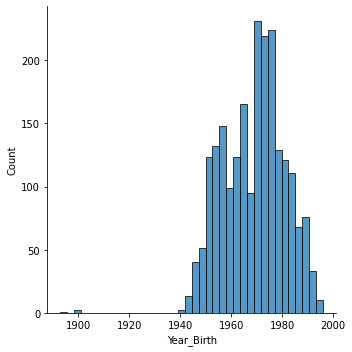

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(data['Year_Birth'])

In [9]:
# Handling education column
data['Education'] = data['Education'].replace(['PhD','Master','2n Cycle'],'Post Graduate')
data['Education'] = data['Education'].replace(['Graduation','Basic'],'Under Graduate')
data['Education'].unique()

array(['Under Graduate', 'Post Graduate'], dtype=object)

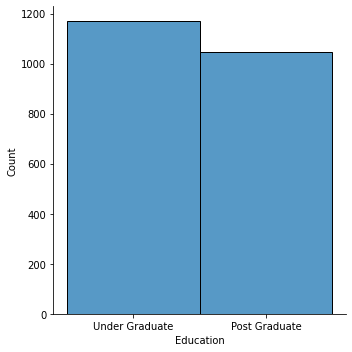

In [10]:
# Vizualizing distribution of education column
sns.displot(data['Education'])

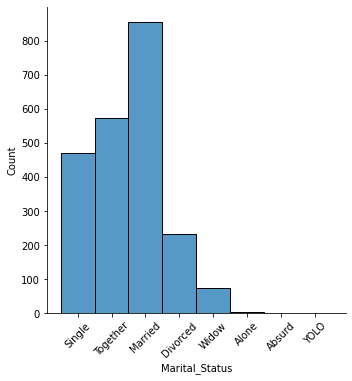

In [11]:
## Vizualizing distribution of marital status column
sns.displot(data['Marital_Status'])
plt.xticks(rotation=45)
plt.show()

In [12]:
data['Marital_Status'] = data['Marital_Status'].replace(['Together','Married'],'Relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')
data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

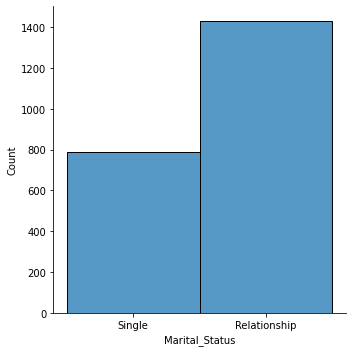

In [13]:
# Vizualizing distribution of updated marital status column
sns.displot(data['Marital_Status'])

In [14]:
# Combining features
print(data['Kidhome'].unique())
print(data['Teenhome'].unique())

data['Total_kids'] = data['Kidhome'] + data['Teenhome']
data['Total_kids'].unique()

[0 1 2]
[0 1 2]


array([0, 2, 1, 3])

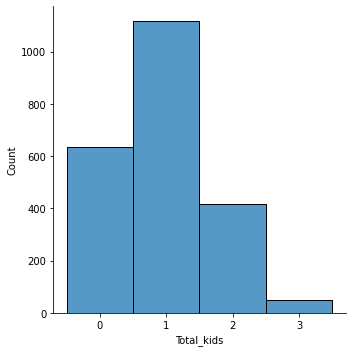

In [15]:
# Vizualizing distribution of total kids column
sns.displot(data['Total_kids'].sort_values().astype(str))

In [16]:
# Viewing all the columns in the new dataframe
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_kids'],
      dtype='object')

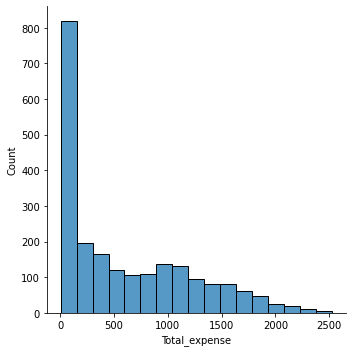

In [17]:
# Creating new features using expense
data['Total_expense'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
sns.displot(data['Total_expense'])

In [18]:
# Creating new features using campaign acceptance features
data['Total_accepted'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data['Total_accepted'].unique()

array([0, 1, 2, 3, 4])

In [19]:
data['Total_accepted']

0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: Total_accepted, Length: 2216, dtype: int64

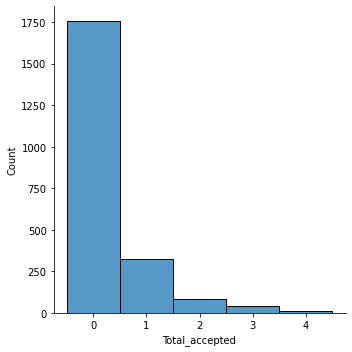

In [20]:
# Vizualizing the distribution plot for total accepted feature
sns.displot(data['Total_accepted'].astype(str))

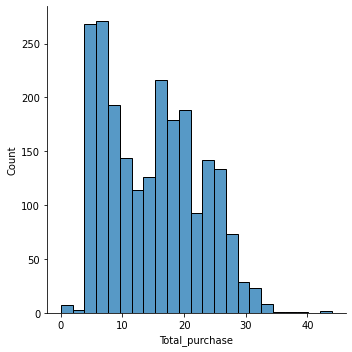

In [21]:
# Creating new feature - Total purchase
data['Total_purchase'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] 
sns.displot(data['Total_purchase'])

In [22]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['first_date'] = pd.to_datetime('01-01-2015')
data['days_engaged'] = (data['first_date'] - data['Dt_Customer']).dt.days

In [23]:
# importing date class from datetime module
from datetime import date

# creating the date object of today's date
todays_date = date.today()

# fetching the current year, month and day of today
data['current_year'] = todays_date.year

data['total_year_enrol'] = data['current_year'] - pd.DatetimeIndex(data['Dt_Customer']).year

In [24]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_kids', 'Total_expense',
       'Total_accepted', 'Total_purchase', 'first_date', 'days_engaged',
       'current_year', 'total_year_enrol'],
      dtype='object')

In [25]:
# Dropping unnecessary columns
data.drop(['Kidhome','Teenhome', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'first_date','ID'],axis=1,inplace=True)
data.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'Complain', 'Response', 'Total_kids', 'Total_expense', 'Total_accepted',
       'Total_purchase', 'days_engaged', 'current_year', 'total_year_enrol'],
      dtype='object')

In [26]:
# Getting all the categorical variable
catg_col=[]
for i in data.columns:
    if(data[i].dtype =='object'):
        catg_col.append(i)
        
print(catg_col)

['Education', 'Marital_Status']


In [27]:
# Label encoding for all categorical nominal variable
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
for i in catg_col:
    data[i]= encoder.fit_transform(data[i])
    
print(data)

      Year_Birth  Education  ...  current_year  total_year_enrol
0           1957          1  ...          2021                 9
1           1954          1  ...          2021                 7
2           1965          1  ...          2021                 8
3           1984          1  ...          2021                 7
4           1981          0  ...          2021                 7
...          ...        ...  ...           ...               ...
2235        1967          1  ...          2021                 8
2236        1946          0  ...          2021                 7
2237        1981          1  ...          2021                 7
2238        1956          0  ...          2021                 7
2239        1954          0  ...          2021                 9

[2216 rows x 14 columns]


In [28]:
# Implement standardization of features
from sklearn.preprocessing import StandardScaler
scale_data = StandardScaler()
df_val = scale_data.fit_transform(data.values)
df_model = pd.DataFrame(df_val, columns=data.columns)
df_model

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Response,Total_kids,Total_expense,Total_accepted,Total_purchase,days_engaged,current_year,total_year_enrol
0,-0.986443,0.945525,1.348829,0.234063,0.310532,-0.097812,2.377952,-1.264803,1.675488,-0.439265,1.319446,1.974875,0.0,1.500343
1,-1.236801,0.945525,1.348829,-0.234559,-0.380509,-0.097812,-0.420530,1.405806,-0.962358,-0.439265,-1.157987,-1.665141,0.0,-1.417393
2,-0.318822,0.945525,-0.741384,0.769478,-0.795134,-0.097812,-0.420530,-1.264803,0.280250,-0.439265,0.797881,-0.172132,0.0,0.041475
3,1.266777,0.945525,-0.741384,-1.017239,-0.795134,-0.097812,-0.420530,0.070501,-0.919224,-0.439265,-0.897205,-1.923298,0.0,-1.417393
4,1.016420,-1.057614,-0.741384,0.240221,1.554407,-0.097812,-0.420530,0.070501,-0.307044,-0.439265,0.537099,-0.821827,0.0,-1.417393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,-0.151917,0.945525,-0.741384,0.356642,-0.104093,-0.097812,-0.420530,0.070501,1.217598,-0.439265,0.406708,0.124749,0.0,0.041475
2212,-1.904422,-1.057614,-0.741384,0.467539,0.241428,-0.097812,-0.420530,2.741110,-0.270546,1.033369,0.928273,-1.940508,0.0,-1.417393
2213,1.016420,0.945525,1.348829,0.188091,1.450751,-0.097812,-0.420530,-1.264803,1.051696,1.033369,0.537099,-0.847643,0.0,-1.417393
2214,-1.069896,-1.057614,-0.741384,0.675388,-1.417072,-0.097812,-0.420530,0.070501,0.391404,-0.439265,1.058664,-0.843341,0.0,-1.417393


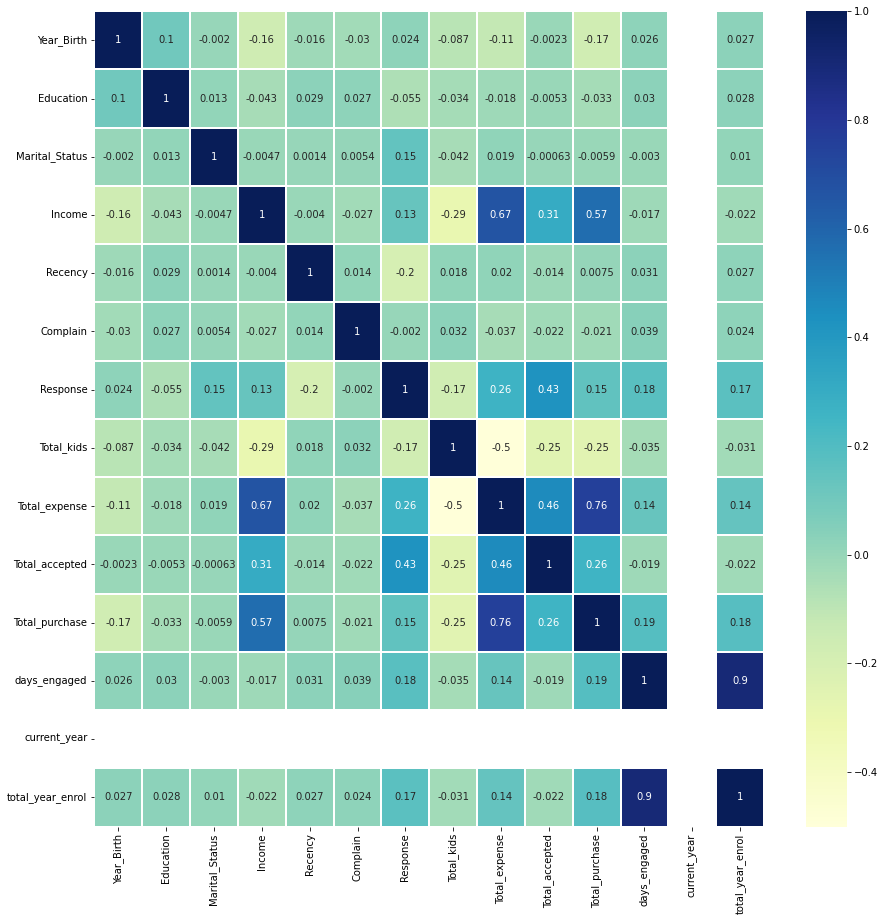

In [29]:
# Determining correlation between all correlation
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,cmap = 'YlGnBu',linewidths=1)

In [30]:
# Creating new dataframe for clustering
df_model.columns
X = df_model.iloc[:,[3,10]]

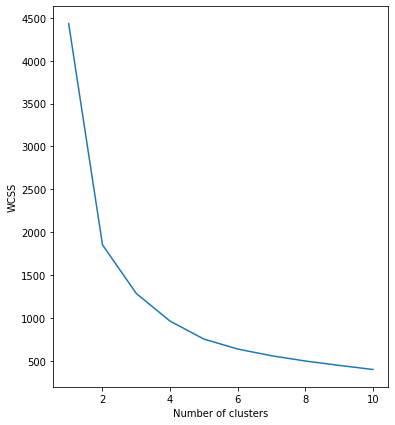

In [31]:
# Elbow method to calculate N
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,7))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()


In [32]:
# Validating all the columns which will be used for clustering
X.columns

Index(['Income', 'Total_purchase'], dtype='object')

In [33]:
# K means Clustering
kmeans = KMeans(n_clusters=2, init="k-means++",random_state=50)
label = kmeans.fit_predict(X[['Income', 'Total_purchase']])

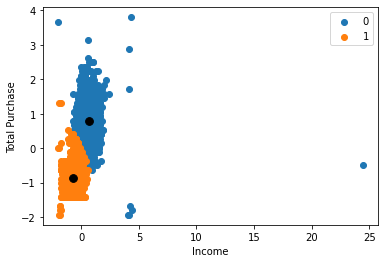

In [35]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(X[label == i].iloc[:,0] , X[label == i].iloc[:,1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 60, color = "black")
plt.xlabel('Income')
plt.ylabel('Total Purchase')
plt.legend()
plt.show()

INSIGHTS


The most important insight is that customer who have low income has less purchases are much wiser than customers who have low income and high purchase

**Classification model** 





In [38]:
#!pip install shap
#!pip install pydataset

     |████████████████████████████████| 371 kB 1.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509248 sha256=ba5211ce5c6572e65a75138c44deab3d8198bd01189ae5a195c4ed4b8ea96fd2
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap
     |████████████████████████████████| 15.9 MB 119 kB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939430 sha256=39db8917239a1444bc55441d789eea4ab8cda5eef31876cbe98367f8505f2545
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [36]:
import shap
import xgboost as xgb
from pydataset import data

In [37]:
data = pd.read_csv("/content/marketing_campaign (1).csv")


In [38]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [39]:
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"])

In [40]:
data.drop("ID",axis=1,inplace=True)

In [41]:
data.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContact                   int64
Z_Revenue   

In [42]:
cat_var=data.select_dtypes("object")
cat_var.columns

Index(['Education', 'Marital_Status'], dtype='object')

In [43]:
num_var=data.select_dtypes(["int64","float64"])
num_var.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [44]:
#load the dataset
#transforn categorical data into dummy variables
cat_encoded=pd.get_dummies(cat_var, drop_first=True)



In [45]:
df=pd.concat([num_var,cat_encoded],axis=1)


In [46]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,0,0,1,0,0,1,0,0,0,0


In [47]:
df['Total_accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

In [48]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Total_accepted
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1,0,0,0,0,0,1,0,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,1,0,0,0,0,0,0,1,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,0,0,0,1,0,0,1,0,0,0,0,0


In [49]:
df['Total_accepted'].unique()

array([0, 1, 2, 3, 4])

In [50]:
df['Total_accepted'].value_counts()/len(df)

0    0.793304
1    0.145089
2    0.037054
3    0.019643
4    0.004911
Name: Total_accepted, dtype: float64

In [51]:
df['Target']=np.where(df['Total_accepted']==0,0,1)

In [52]:
df['Target'].value_counts()/len(df)

0    0.793304
1    0.206696
Name: Target, dtype: float64

In [53]:
df.drop(["Response","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Total_accepted"],axis=1,inplace=True)

In [54]:
df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Target
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,0,1,0,0,0,0,0,1,0,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,1,0,0,0,0,0,1,0,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,1,0,0,0,0,0,0,1,0,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,1,0,0,0,0,0,0,1,0,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0,0,1,0,0,1,0,0,0,0,0


In [55]:
#isolate the all X and Y variables
X=df.iloc[:,:-1]
Y=df['Target']

In [56]:
X

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,3,11,0,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,3,11,0,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,3,11,0,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,3,11,0,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,3,11,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,3,11,0,1,0,0,0,0,1,0,0,0,0
2236,1946,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,3,11,0,0,0,1,0,0,0,0,1,0,0
2237,1981,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,3,11,0,1,0,0,0,1,0,0,0,0,0
2238,1956,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,3,11,0,0,1,0,0,0,0,0,1,0,0


In [57]:
Y


0       0
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    0
Name: Target, Length: 2240, dtype: int64

In [58]:
X.dtypes

Year_Birth                   int64
Income                     float64
Kidhome                      int64
Teenhome                     int64
Recency                      int64
MntWines                     int64
MntFruits                    int64
MntMeatProducts              int64
MntFishProducts              int64
MntSweetProducts             int64
MntGoldProds                 int64
NumDealsPurchases            int64
NumWebPurchases              int64
NumCatalogPurchases          int64
NumStorePurchases            int64
NumWebVisitsMonth            int64
Complain                     int64
Z_CostContact                int64
Z_Revenue                    int64
Education_Basic              uint8
Education_Graduation         uint8
Education_Master             uint8
Education_PhD                uint8
Marital_Status_Alone         uint8
Marital_Status_Divorced      uint8
Marital_Status_Married       uint8
Marital_Status_Single        uint8
Marital_Status_Together      uint8
Marital_Status_Widow

In [59]:
#CREATE boost matrix
matrix= xgb.DMatrix(X,label=Y)


In [60]:
matrix

In [61]:
#set the parameters
param={'random_state': 1500,'eval_metric':"auc", 'objective':"binary:logistic" }

In [62]:
#run xgboost
model=xgb.train(params=param, dtrain=matrix, num_boost_round=20)


In [63]:
model.feature_names

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Education_Basic',
 'Education_Graduation',
 'Education_Master',
 'Education_PhD',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

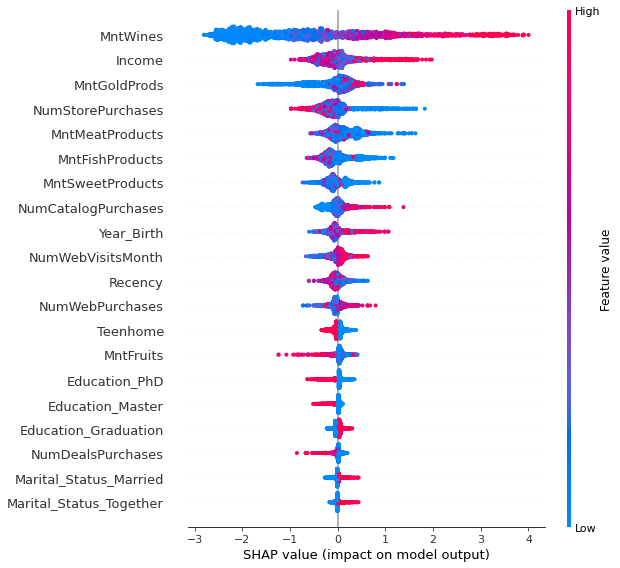

In [64]:
#Shap values
explainer=shap.TreeExplainer(model)
shap_values=explainer.shap_values(X)
shap.summary_plot(shap_values,X)

In [65]:
model.attributes

<bound method Booster.attributes of <xgboost.core.Booster object at 0x7f8c0f646c90>>

In [66]:
import matplotlib.pyplot as plt


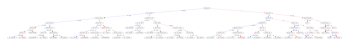

In [67]:
xgb.plot_tree(model,num_trees=0)
plt.rcParams['figure.figsize'] = [500, 300]
plt.show()

In [68]:
params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 6, 'alpha': 10}

cv_results = xgb.cv(dtrain=matrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=123)

In [69]:
cv_results.head()

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.770758,0.005074,0.749594,0.022301
1,0.806127,0.016068,0.774059,0.033816
2,0.811700,0.013754,0.777880,0.031401
3,0.808899,0.012648,0.782747,0.031578
4,0.812829,0.010502,0.790298,0.026109


In [70]:
print((cv_results["train-auc-mean"]).tail(1))
print((cv_results["test-auc-mean"]).tail(1))


49    0.895336
Name: train-auc-mean, dtype: float64
49    0.839314
Name: test-auc-mean, dtype: float64


Classification Model Interpretation Based On Shap Analysis:

A high amount spent on the “Mntwines” has high, positive and negative impact on the Promotion accepted.
The “high” comes from the red color, and the “positive” impact is shown on the X-axis.
Similarly, we will say the “Income” is positively correlated with the target variable.
Based on the xgboost model, around 90% prediction is correct on the trained dataset. Also, around 84% is correct on the validation dataset.